In [1]:
# Full pipeline with all enhancements included

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [7]:
# Data Preprocessing
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [9]:
# Splitting into features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [15]:
# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc
    })


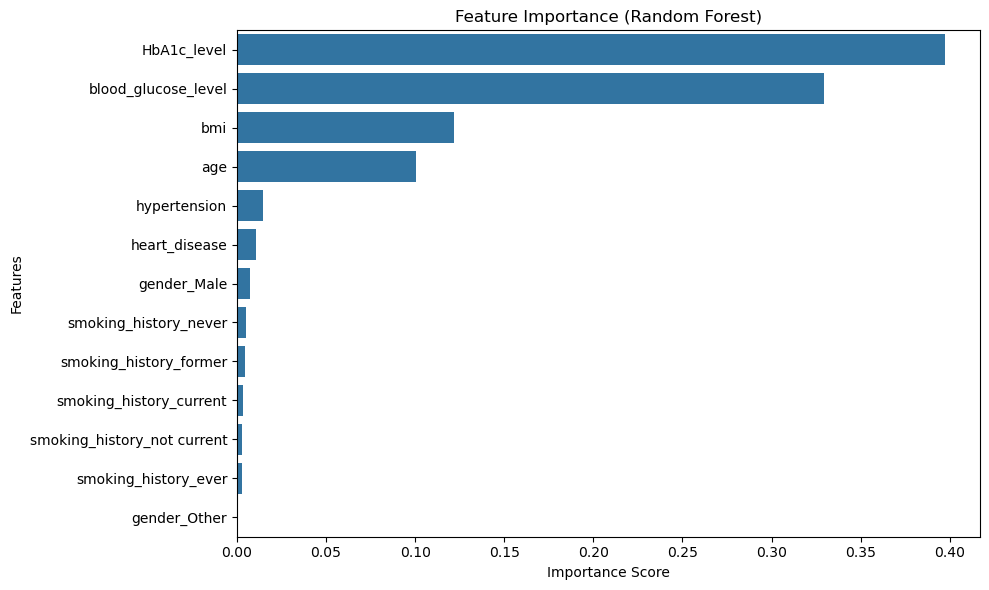

In [17]:
# Feature Importance - Random Forest
rf_model = models['Random Forest']
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

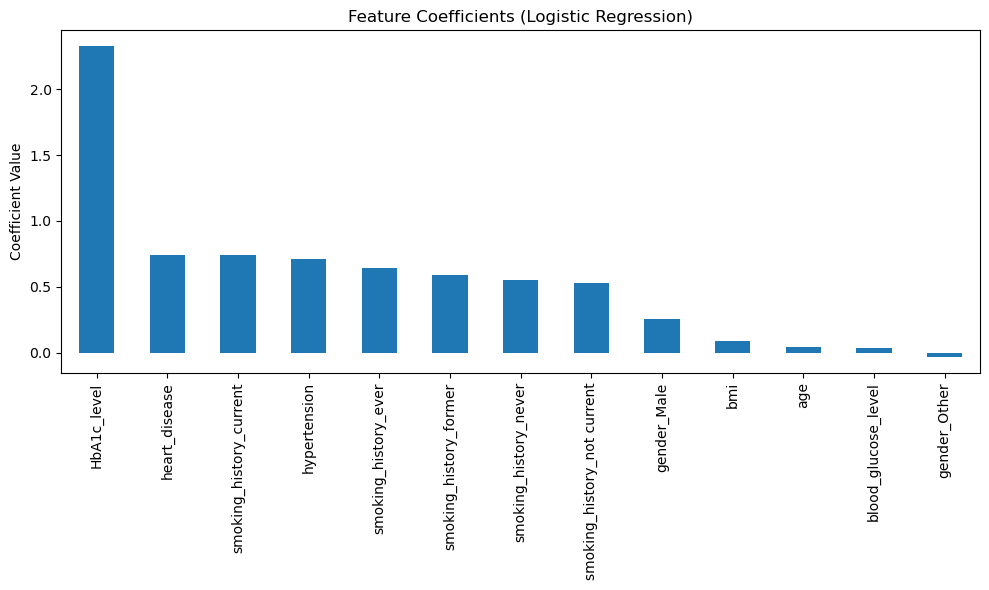

In [19]:
# Coefficients - Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
coefficients = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Feature Coefficients (Logistic Regression)')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [23]:
# Hyperparameter Tuning - Random Forest
# Predefined tuned Random Forest
best_rf = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=2,
                                 min_samples_leaf=1, bootstrap=True, random_state=42)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
best_rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

results.append({
    'Model': 'Random Forest (Tuned)',
    'Accuracy': accuracy_score(y_test, best_rf_pred),
    'Precision': precision_score(y_test, best_rf_pred),
    'Recall': recall_score(y_test, best_rf_pred),
    'F1 Score': f1_score(y_test, best_rf_pred),
    'AUC': best_rf_auc
})

In [25]:
# Cross-validation scores
cross_val_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    cross_val_scores[name] = scores.mean()

In [29]:
# Final results table
results_df = pd.DataFrame(results)
results_df['CrossVal (5-fold Mean Acc)'] = results_df['Model'].map(cross_val_scores).fillna('Tuned separately')

# Display final table (for Jupyter or terminal)
print(results_df)


                   Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0    Logistic Regression    0.9591   0.864754  0.617681  0.720628  0.961692   
1          Decision Tree    0.9520   0.710349  0.739461  0.724613  0.855760   
2          Random Forest    0.9699   0.945968  0.686768  0.795794  0.963757   
3  Random Forest (Tuned)    0.9719   0.977500  0.686768  0.806740  0.972464   

  CrossVal (5-fold Mean Acc)  
0                    0.96032  
1                    0.95145  
2                    0.96984  
3           Tuned separately  
